## Exploring the impact of infill development vs unbounded development

##### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Empirical cumulative distribution function

In [2]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

##### Draw bootstrap replicates

In [3]:
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates

##### Aggregate data and draw boostrap replicates

In [4]:
def aggregate(data, func, trials=1000, size=1):
    bs_replicates = np.empty(trials)
    for i in range(trials):
        bs_replicates[i] = func(np.random.choice(data, size=size))
    return bs_replicates

##### Generate permutation samples

In [5]:
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample1 = permuted_data[:len(data1)]
    perm_sample2 = permuted_data[len(data1):]
    return perm_sample1, perm_sample2

##### Draw permutation replicates

In [6]:
def draw_perm_reps(data1, data2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample1, perm_sample2 = permutation_sample(data1, data2)
        perm_replicates[i] = func(perm_sample1, perm_sample2)
    return perm_replicates

##### Return difference in means

In [7]:
def mean_diff(data1, data2):
    return np.mean(data1) - np.mean(data2)

##### Load data
Completion Efficiency Factor (CEF) defined as ratio of DCA-derived EUR to geologically-derived EUR

In [8]:
path = r'for presentation'
file = r'cef.csv'
data = pd.read_csv(file)
pd.options.display.float_format = '{:,.2f}'.format

infill_true = data[data['infill'] == 1]['cef']
infill_false = data[data['infill'] == 0]['cef']

print('Infill:',infill_true.describe())
print('Not Infill:', infill_false.describe())

Infill: count   25.00
mean     0.77
std      0.30
min      0.37
25%      0.52
50%      0.76
75%      0.87
max      1.48
Name: cef, dtype: float64
Not Infill: count   57.00
mean     1.13
std      0.31
min      0.58
25%      0.93
50%      1.10
75%      1.29
max      1.87
Name: cef, dtype: float64


##### Set plot layout

In [9]:
sns.set_context('poster')

##### Swarm Plot

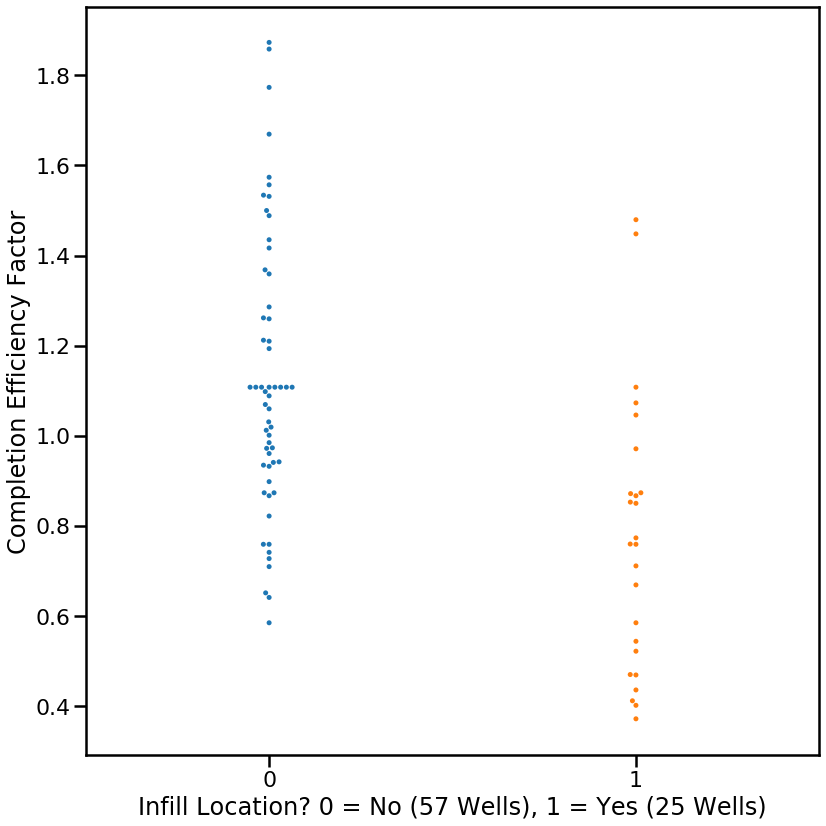

In [10]:
plt.figure(1, figsize=(12, 12))
sns.swarmplot(x='infill', y='cef', data=data)
plt.ylabel('Completion Efficiency Factor')
plt.xlabel('Infill Location? 0 = No ({} Wells), 1 = Yes ({} Wells)'.format(int(data[data.infill == 0].cef.count()), int(data[data.infill == 1].cef.count())))
plt.tight_layout()

##### Box Plot

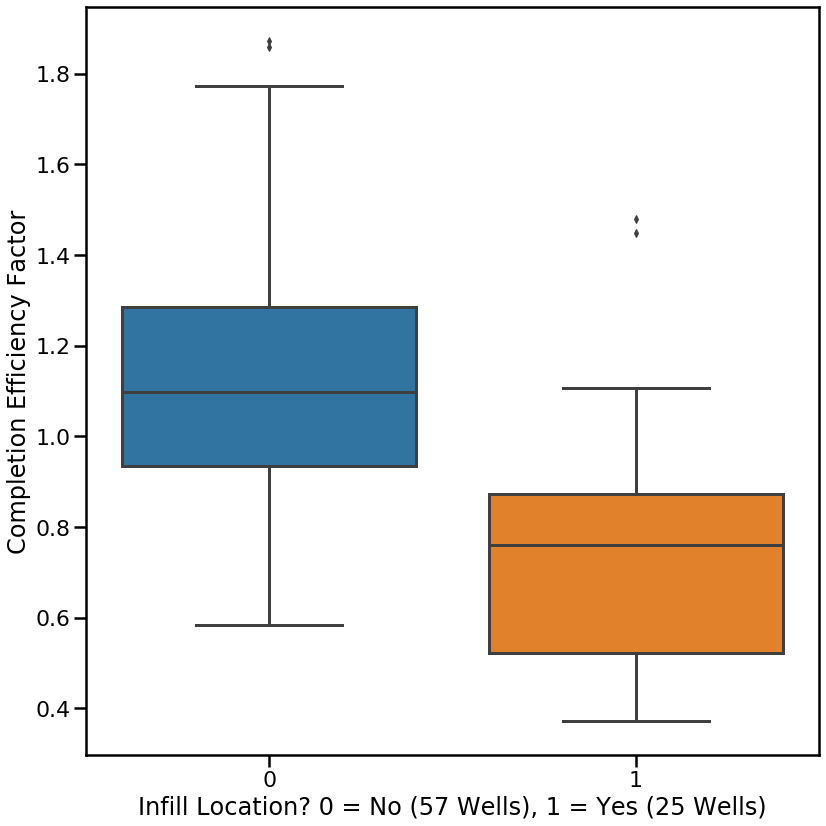

In [11]:
plt.figure(1, figsize=(12, 12))
sns.boxplot(x='infill', y='cef', data=data)
plt.ylabel('Completion Efficiency Factor')
plt.xlabel('Infill Location? 0 = No ({} Wells), 1 = Yes ({} Wells)'.format(int(data[data.infill == 0].cef.count()), int(data[data.infill == 1].cef.count())))
plt.tight_layout()

##### ECDF

Text(0, 0.5, 'ECDF')

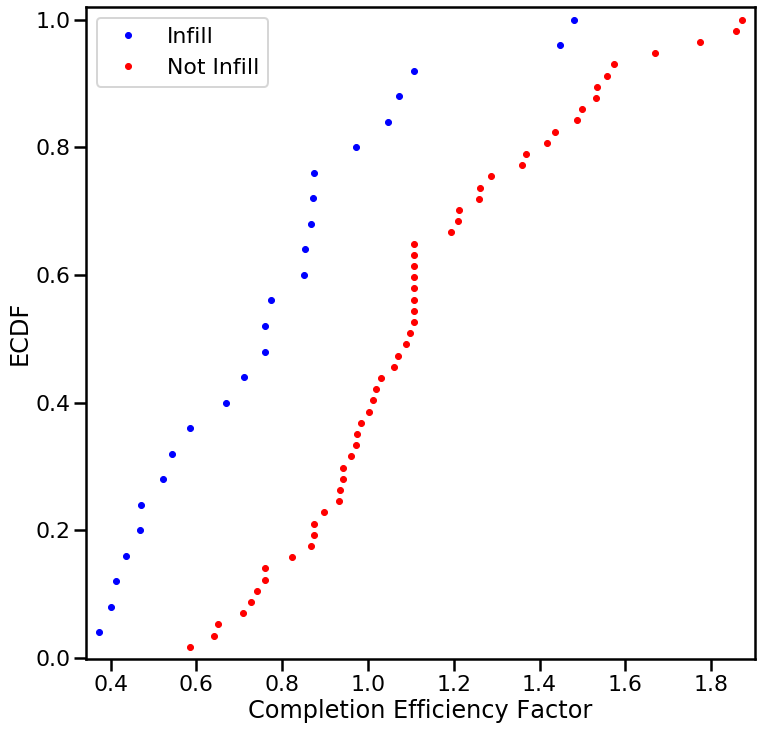

In [12]:
plt.figure(1, figsize=(12, 12))
x_true, y_true = ecdf(infill_true)
x_false, y_false = ecdf(infill_false)
plt.plot(x_true, y_true, marker='.', linestyle='none', color='blue', label='Infill')
plt.plot(x_false, y_false, marker='.', linestyle='none', color='red', label='Not Infill')
plt.margins(0.02)
plt.legend(loc=0)
plt.xlabel('Completion Efficiency Factor')
plt.ylabel('ECDF')

##### Bootstrapped ECDF

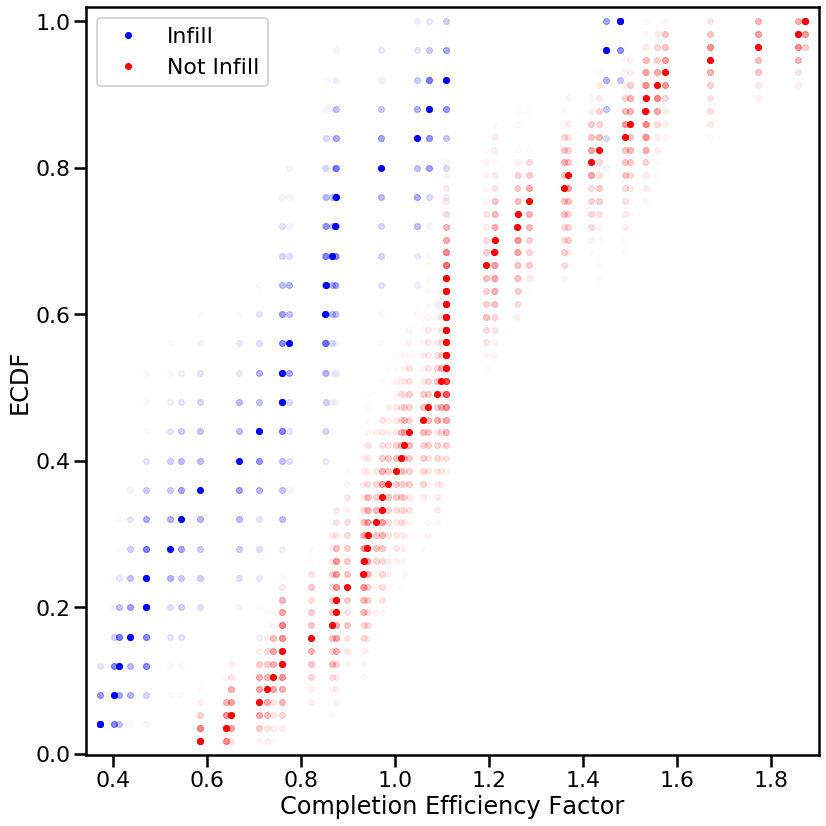

In [13]:
plt.figure(1, figsize=(12, 12))
for i in range(100):
   true_bs_sample = np.random.choice(infill_true, len(infill_true))
   false_bs_sample = np.random.choice(infill_false, len(infill_false))
   x_true_bs, y_true_bs = ecdf(true_bs_sample)
   x_false_bs, y_false_bs = ecdf(false_bs_sample)    
   plt.plot(x_true_bs, y_true_bs, marker='.', linestyle='none', color='blue', alpha=0.02)
   plt.plot(x_false_bs, y_false_bs, marker='.', linestyle='none', color='red', alpha=0.02)
x_true, y_true = ecdf(infill_true)
x_false, y_false = ecdf(infill_false)
plt.plot(x_true, y_true, marker='.', linestyle='none', color='blue', label='Infill')
plt.plot(x_false, y_false, marker='.', linestyle='none', color='red', label='Not Infill')
plt.margins(0.02)
plt.legend(loc=0)
plt.xlabel('Completion Efficiency Factor')
plt.ylabel('ECDF')
plt.tight_layout()

##### Confidence intervals on mean

Infill mean: 0.7729494014800001 95% Conf Interval: [0.66165989 0.89506147]
Not Infill mean: 1.1254778328070174 95% Conf Interval: [1.04710686 1.20638193]


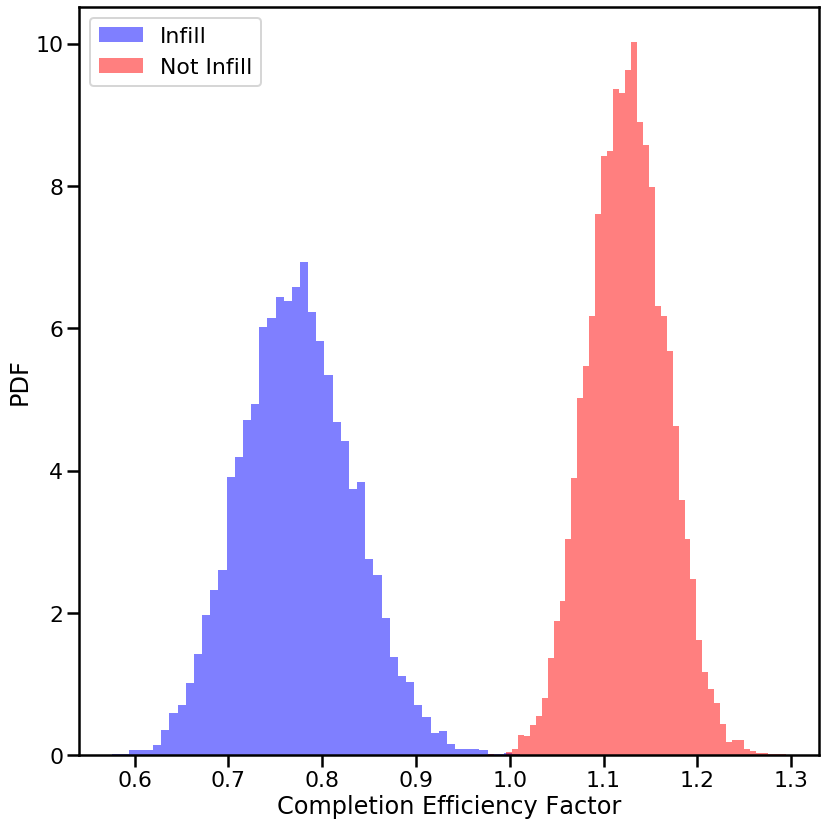

In [14]:
plt.figure(1, figsize=(12, 12))
bs_reps_true = draw_bs_reps(infill_true, np.mean, 10000)
bs_reps_false = draw_bs_reps(infill_false, np.mean, 10000)
print('Infill mean:', np.mean(infill_true), '95% Conf Interval:', np.percentile(bs_reps_true, [2.5, 97.5]))
print('Not Infill mean:', np.mean(infill_false), '95% Conf Interval:', np.percentile(bs_reps_false, [2.5, 97.5]))
plt.hist(bs_reps_true, bins=50, density=True, color='blue', alpha=0.5, label='Infill')
plt.hist(bs_reps_false, bins=50, density=True, color='red', alpha=0.5, label='Not Infill')
plt.xlabel('Completion Efficiency Factor')
plt.ylabel('PDF')
plt.legend(loc=0)
plt.tight_layout()

##### What would ECDF look like if Caerus and Others were identically distributed?

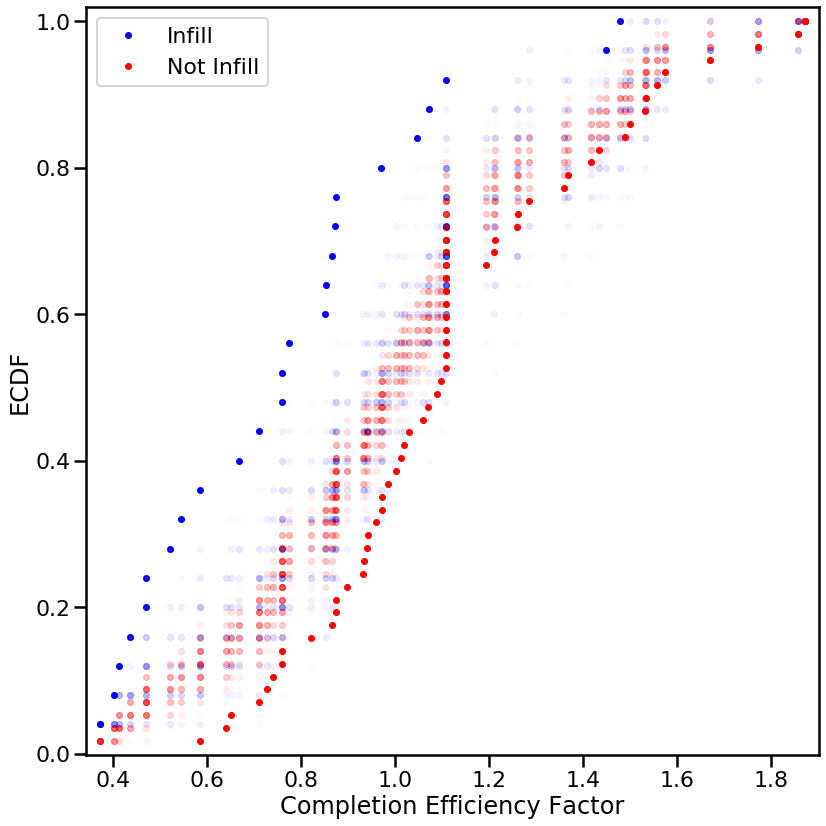

In [15]:
plt.figure(1, figsize=(12, 12))
for i in range(100):
   perm_sample1, perm_sample2 = permutation_sample(infill_true, infill_false)
   x1, y1 = ecdf(perm_sample1)
   x2, y2 = ecdf(perm_sample2)
   plt.plot(x1, y1, marker='.', linestyle='none', color='blue', alpha=0.02)
   plt.plot(x2, y2, marker='.', linestyle='none', color='red', alpha=0.02)
x_true, y_true = ecdf(infill_true)
x_false, y_false = ecdf(infill_false)
plt.plot(x_true, y_true, marker='.', linestyle='none', color='blue', label='Infill')
plt.plot(x_false, y_false, marker='.', linestyle='none', color='red', label='Not Infill')
plt.margins(0.02)
plt.legend(loc=0)
plt.xlabel('Completion Efficiency Factor')
plt.ylabel('ECDF')
plt.tight_layout()

##### Null Hypothesis: Distributions are identical
##### Test statistic: Difference in Completion Efficiency Factor

p-value: 1e-05


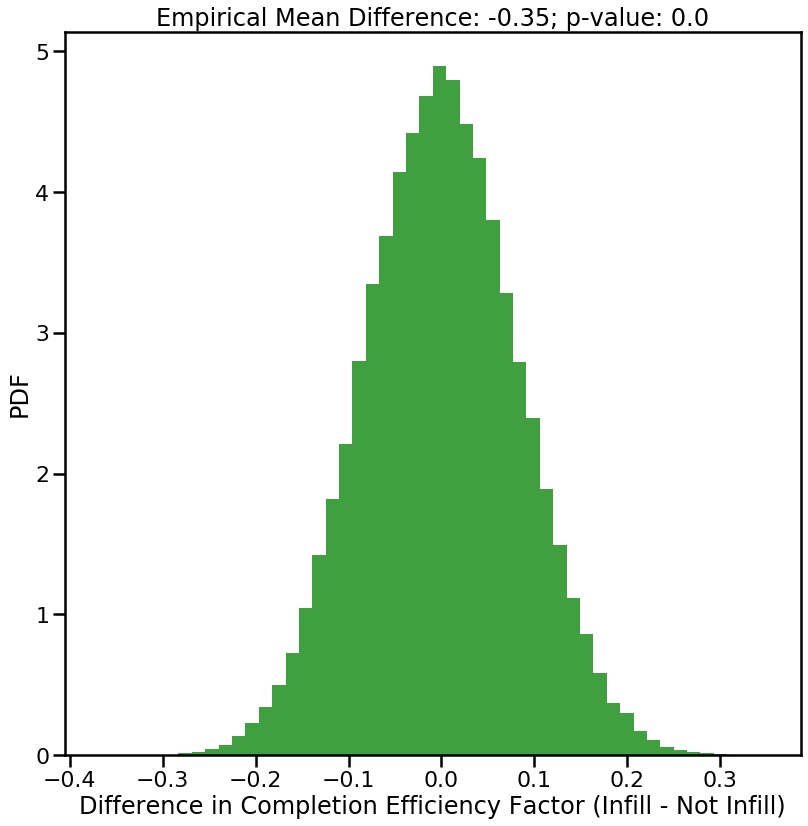

In [16]:
plt.figure(1, figsize=(12, 12))
empirical_mean_diff = mean_diff(infill_true, infill_false)
perm_replicates = draw_perm_reps(infill_true, infill_false, mean_diff, 100000)
p = np.sum(perm_replicates <= empirical_mean_diff) / len(perm_replicates)
print('p-value:', p)
plt.hist(perm_replicates, bins=50, density=True, color='green', alpha=0.75)
plt.xlabel('Difference in Completion Efficiency Factor (Infill - Not Infill)')
plt.ylabel('PDF')
plt.title('Empirical Mean Difference: '+str(round(empirical_mean_diff,2))+'; '+ 'p-value: '+str(round(p,4)))
plt.tight_layout()

##### Null Hypothesis: Means are identical
##### Test statistic: Difference in Completion Efficiency Factor

p-value: 0.0


Text(0.5, 1.0, 'Empirical Mean Difference: -0.35; p-value: 0.0')

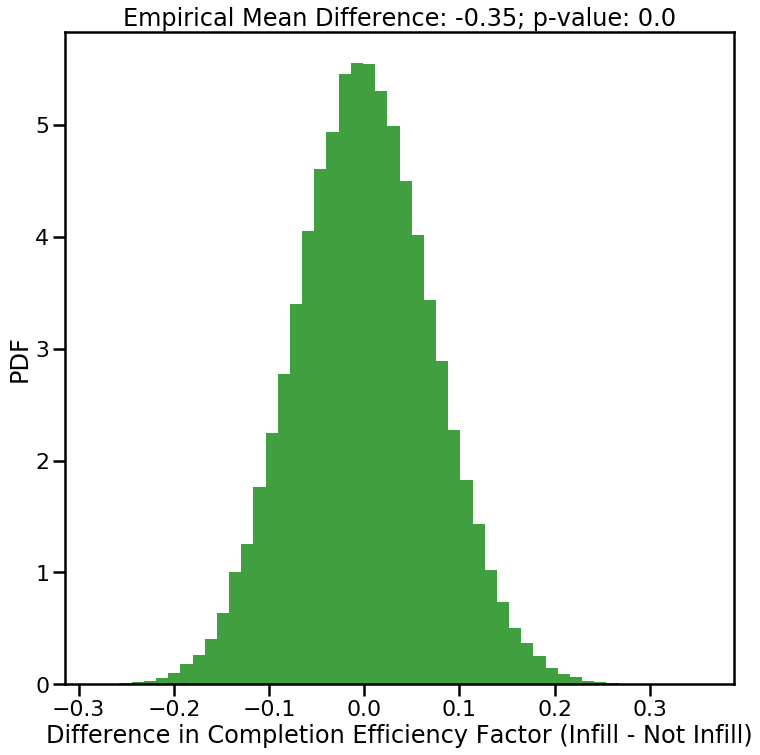

In [17]:
plt.figure(1, figsize=(12, 12))
empirical_mean_diff = mean_diff(infill_true, infill_false)
pooled_mean = np.mean(np.concatenate((infill_true, infill_false)))
true_shifted = infill_true - np.mean(infill_true) + pooled_mean 
false_shifted = infill_false - np.mean(infill_false) + pooled_mean 
bs_reps_true = draw_bs_reps(true_shifted, np.mean, 100000)
bs_reps_false = draw_bs_reps(false_shifted, np.mean, 100000)
bs_replicates = bs_reps_true - bs_reps_false
p = np.sum(bs_replicates <= empirical_mean_diff) / len(bs_replicates)
print('p-value:', p)
plt.hist(bs_replicates, bins=50, density=True, color='green', alpha=0.75)
plt.xlabel('Difference in Completion Efficiency Factor (Infill - Not Infill)')
plt.ylabel('PDF')
plt.title('Empirical Mean Difference: '+str(round(empirical_mean_diff,2))+'; '+ 'p-value: '+str(p))

##### Aggregation

Infill mean: 0.7734347086784724 90% Conf Interval: [0.5891202  0.96976164]
Not Infill mean: 1.1253728198214588 90% Conf Interval: [1.03640501 1.21612727]


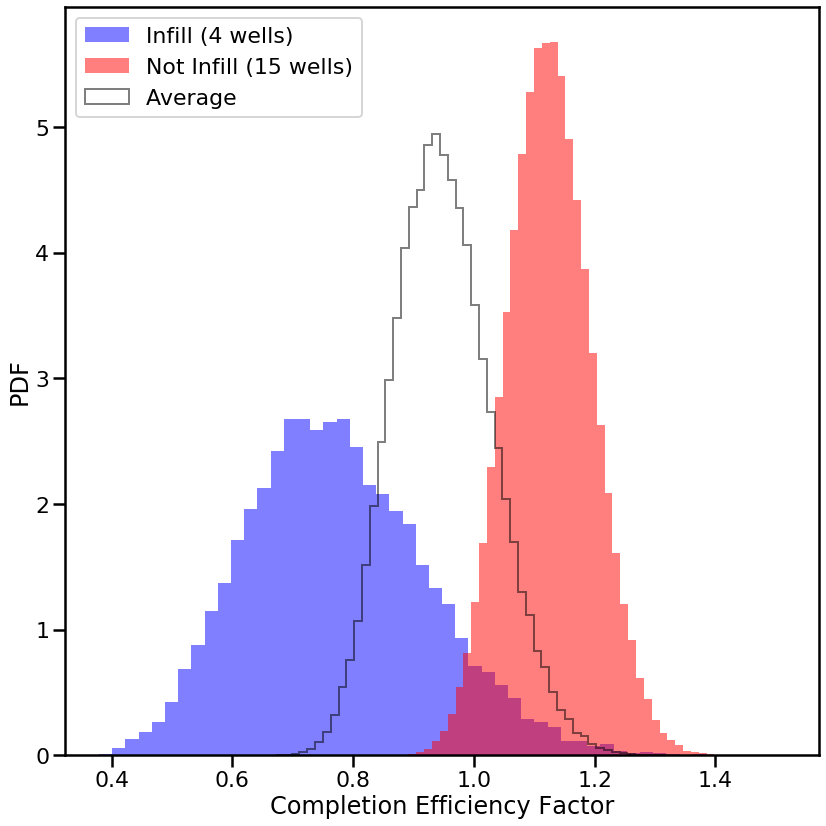

In [18]:
plt.figure(1, figsize=(12, 12))
agg_true = aggregate(infill_true, np.mean, 100000, 4)
agg_false = aggregate(infill_false, np.mean, 100000, 19)
agg_avg = (agg_true + agg_false) / 2
print('Infill mean:', np.mean(agg_true), '90% Conf Interval:', np.percentile(agg_true, [10, 90]))
print('Not Infill mean:', np.mean(agg_false), '90% Conf Interval:', np.percentile(agg_false, [10, 90]))
plt.hist(agg_true, bins=50, density=True, color='blue', alpha=0.5, label='Infill (4 wells)')
plt.hist(agg_false, bins=50, density=True, color='red', alpha=0.5, label='Not Infill (15 wells)')
plt.hist(agg_avg, bins=50, density=True, histtype='step', color='black', lw=2, alpha=0.5, label='Average')
plt.xlabel('Completion Efficiency Factor')
plt.ylabel('PDF')
plt.legend(loc=0)
plt.tight_layout()